In [1]:
# import
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('kirc_824.csv')

In [26]:
# calculate variance across rows
dfVar = df
dfVar['featureVar'] = dfVar.var(axis=1)

In [27]:
dfVar['featureVar'] 

0          0.075665
1          0.041061
2          0.010613
3          0.077318
4          0.003096
             ...   
4022629    1.793970
4022630    2.208306
4022631    1.984936
4022632    2.227510
4022633    1.444538
Name: featureVar, Length: 4022634, dtype: float64

In [42]:
# max, min, mean var
dfVar['featureVar'].max(), dfVar['featureVar'].min(), dfVar['featureVar'].mean()

(24.87160490214576, 2.559014933563607e-28, 0.07694467084752624)

In [48]:
# q.95, q.01
np.quantile(dfVar['featureVar'], [0.95, 0.01])

array([2.98017542e-01, 4.38106796e-05])

In [77]:
# check how many features we have that meet our filter condition
# var >= 0.02
filterCondition = dfVar.featureVar >= 0.02
sum(filterCondition)

728903

In [79]:
# select only features with variance >= 0.02
dfVarFiltered = dfVar[filterCondition]

In [80]:
# check shape
dfVarFiltered.shape

(728903, 825)

In [81]:
# pd retains our original row names
dfVarFiltered

,subj_1_tumor,subj_2_tumor,subj_3_tumor,subj_4_tumor,subj_5_tumor,subj_6_tumor,subj_7_tumor,subj_8_tumor,subj_9_tumor,subj_10_tumor,...,subj_739_normal,subj_740_normal,subj_741_normal,subj_742_normal,subj_743_normal,subj_744_normal,subj_745_normal,subj_746_normal,subj_747_normal,featureVar
0,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,...,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,0.075665
1,-3.73,-3.54,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,...,-3.73,-3.73,-3.73,-3.73,-3.73,-2.30,-3.73,-3.73,-3.73,0.041061
3,-3.58,-3.73,-3.00,-3.35,-3.54,-3.73,-3.73,-3.40,-3.73,-3.73,...,-3.19,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,-3.51,-3.73,0.077318
5,-2.05,-3.73,-3.73,-3.73,-3.73,-2.99,-3.73,-3.73,-3.73,-3.73,...,-3.73,-3.73,-1.73,-3.73,-1.94,-1.70,-3.73,-3.73,-1.30,0.422942
6,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,...,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,0.227331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4022629,11.00,10.15,9.87,11.82,9.51,10.82,9.04,9.71,11.25,8.34,...,13.25,13.49,11.82,12.54,11.87,13.51,11.22,11.62,11.05,1.793970
4022630,1.82,0.81,0.32,4.35,0.90,2.38,-0.30,0.89,4.12,0.45,...,3.61,4.03,3.46,2.55,0.98,2.57,1.16,2.15,1.83,2.208306
4022631,11.53,11.42,12.43,13.34,11.14,13.73,11.71,13.07,14.92,10.93,...,14.51,15.94,14.12,16.56,15.99,18.23,15.35,14.86,15.80,1.984936
4022632,-0.35,-3.73,-0.70,-0.90,-3.22,0.44,-1.97,-2.23,5.38,-2.67,...,0.95,0.84,1.42,1.37,-1.20,0.13,-2.29,-1.24,-2.20,2.227510


In [2]:
# load in our saved csv
dfVarFiltered = pd.read_csv('kirc_824_varFiltered_02.csv')

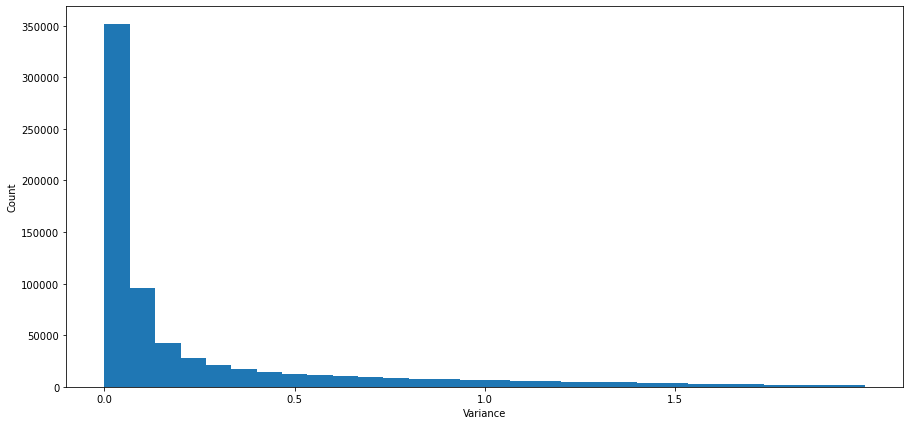

In [36]:
# plot distribution by count
plt.hist(dfVarFiltered['featureVar'], density=False, bins=30, range = [0,2])
plt.xticks(np.arange(0, 2, .5), fontsize = 10)
plt.rcParams['figure.figsize'] = [15, 7]
plt.ylabel('Count')
plt.xlabel('Variance')
plt.show()

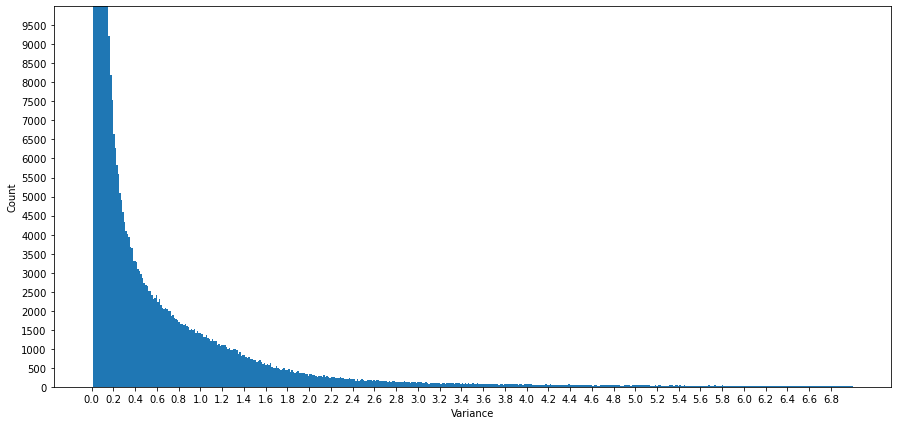

In [58]:
# plot distribution by count
# we can change the y axis to something that shows the higher end better
plt.hist(dfVarFiltered['featureVar'], density=False, bins=500, range = [0,7])
plt.xticks(np.arange(0, 7, .2), fontsize = 10)
plt.yticks(np.arange(0, 10000, 500))
plt.ylim([0,10000])
plt.rcParams['figure.figsize'] = [15, 7]
plt.ylabel('Count')
plt.xlabel('Variance')
plt.show()

In [54]:
# check a more stringent filter condition 
filterCondition2 = dfVarFiltered.featureVar >= 4
sum(filterCondition2) # a cut off of >= 4 leaves us ~10k features

9693

In [59]:
# lest use these features 
df_newfilter = dfVarFiltered[filterCondition2]

In [60]:
df_newfilter

,Unnamed: 0,subj_1_tumor,subj_2_tumor,subj_3_tumor,subj_4_tumor,subj_5_tumor,subj_6_tumor,subj_7_tumor,subj_8_tumor,subj_9_tumor,...,subj_739_normal,subj_740_normal,subj_741_normal,subj_742_normal,subj_743_normal,subj_744_normal,subj_745_normal,subj_746_normal,subj_747_normal,featureVar
2356,15939,-0.39,-3.73,-3.73,-3.73,-3.73,1.08,-3.73,-0.46,-3.73,...,-3.73,-0.10,-0.22,3.15,1.25,3.10,-3.73,0.81,2.41,4.535713
5210,37625,-0.38,-3.73,-3.73,1.02,-3.73,-3.73,-3.73,0.47,-3.73,...,1.55,3.76,3.63,2.50,2.96,-3.73,4.13,4.72,2.36,5.015747
6271,45120,-0.97,-0.32,-0.12,0.45,0.58,2.40,0.14,1.11,3.84,...,-3.73,-3.73,-2.46,-1.72,-1.90,-3.73,-1.81,-3.73,-3.73,4.097861
6547,47365,0.26,0.59,4.45,-3.73,4.00,4.34,-1.82,1.99,-3.73,...,-2.27,-2.33,-1.88,-3.73,-2.06,-1.67,-2.21,-2.57,-3.73,5.508125
6548,47366,-0.99,-0.19,3.85,-3.35,3.34,3.00,-2.09,0.93,-3.73,...,-2.91,-3.73,-3.73,-3.73,-2.74,-3.73,-3.73,-3.73,-3.73,5.007493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728807,4022408,-3.73,1.78,1.73,-3.73,1.65,1.47,-3.73,2.26,3.75,...,-2.80,-3.01,-3.12,4.51,4.86,4.64,5.14,5.12,-3.73,7.878025
728850,4022546,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,0.40,-3.73,...,-3.73,-3.73,-3.73,-3.73,-0.41,-3.73,-1.22,-3.73,-3.73,4.319973
728877,4022608,4.94,4.74,3.72,5.99,5.08,6.93,3.88,5.17,10.73,...,3.09,0.54,2.55,0.44,-3.73,1.50,-0.98,-2.07,3.18,6.914597
728879,4022610,4.07,3.66,2.86,5.77,4.09,5.66,3.54,4.64,9.26,...,-0.16,1.02,-1.50,0.67,-3.05,-0.74,-1.35,-2.12,-0.61,5.255163


In [62]:
# rename the feature name column
df_newfilter_fixednames = df_newfilter.rename(columns = {'Unnamed: 0': 'featureNames'})

In [63]:
df_newfilter_fixednames = df_newfilter_fixednames.set_index('featureNames')

In [64]:
df_newfilter_fixednames

,subj_1_tumor,subj_2_tumor,subj_3_tumor,subj_4_tumor,subj_5_tumor,subj_6_tumor,subj_7_tumor,subj_8_tumor,subj_9_tumor,subj_10_tumor,...,subj_739_normal,subj_740_normal,subj_741_normal,subj_742_normal,subj_743_normal,subj_744_normal,subj_745_normal,subj_746_normal,subj_747_normal,featureVar
featureNames,,,,,,,,,,,,,,,,,,,,,
15939,-0.39,-3.73,-3.73,-3.73,-3.73,1.08,-3.73,-0.46,-3.73,-0.14,...,-3.73,-0.10,-0.22,3.15,1.25,3.10,-3.73,0.81,2.41,4.535713
37625,-0.38,-3.73,-3.73,1.02,-3.73,-3.73,-3.73,0.47,-3.73,-0.81,...,1.55,3.76,3.63,2.50,2.96,-3.73,4.13,4.72,2.36,5.015747
45120,-0.97,-0.32,-0.12,0.45,0.58,2.40,0.14,1.11,3.84,1.08,...,-3.73,-3.73,-2.46,-1.72,-1.90,-3.73,-1.81,-3.73,-3.73,4.097861
47365,0.26,0.59,4.45,-3.73,4.00,4.34,-1.82,1.99,-3.73,-0.13,...,-2.27,-2.33,-1.88,-3.73,-2.06,-1.67,-2.21,-2.57,-3.73,5.508125
47366,-0.99,-0.19,3.85,-3.35,3.34,3.00,-2.09,0.93,-3.73,-1.36,...,-2.91,-3.73,-3.73,-3.73,-2.74,-3.73,-3.73,-3.73,-3.73,5.007493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4022408,-3.73,1.78,1.73,-3.73,1.65,1.47,-3.73,2.26,3.75,-3.73,...,-2.80,-3.01,-3.12,4.51,4.86,4.64,5.14,5.12,-3.73,7.878025
4022546,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,-3.73,0.40,-3.73,-3.73,...,-3.73,-3.73,-3.73,-3.73,-0.41,-3.73,-1.22,-3.73,-3.73,4.319973
4022608,4.94,4.74,3.72,5.99,5.08,6.93,3.88,5.17,10.73,5.60,...,3.09,0.54,2.55,0.44,-3.73,1.50,-0.98,-2.07,3.18,6.914597


In [65]:
# # write our filtered df to csv
df_newfilter_fixednames.to_csv('kirc_824_varFiltered_cutoff_4.csv')